In [ ]:
import pandas as pd
import numpy as np

data = np.loadtxt("data/node_information_id_remapped.csv", delimiter=",")
data = data[:, 1:]

#### Correlation matrix

/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


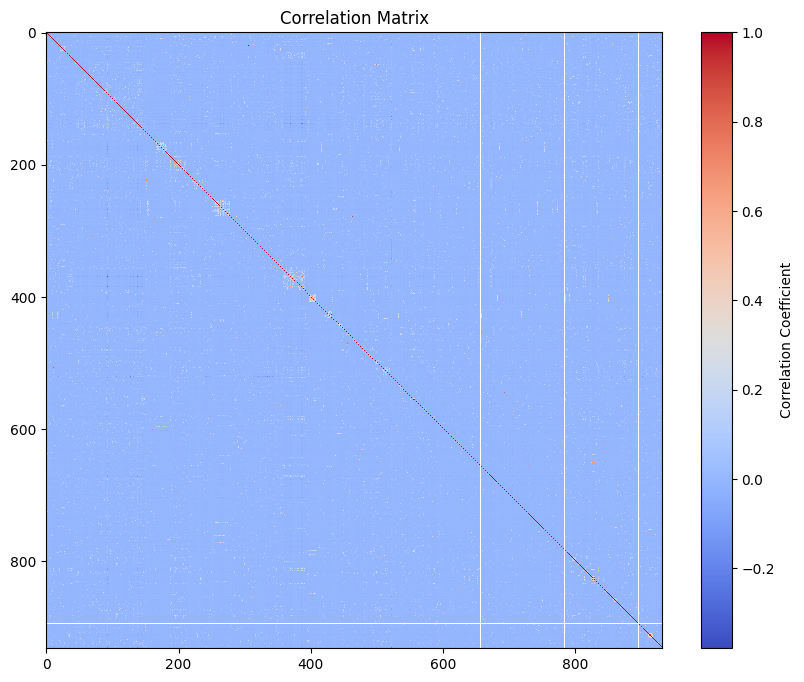

In [5]:
import matplotlib.pyplot as plt

correlation_matrix = np.corrcoef(data, rowvar=False)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation Coefficient")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300)
# plt.show()

#### Jaccard index

/var/folders/_y/2rw4wkns73v1mc9wlr3l0k_h0000gn/T/ipykernel_73336/1266843689.py:7: RuntimeWarning: invalid value encountered in divide
  jaccard_similarity = intersections / (feature_counts_2d - intersections)


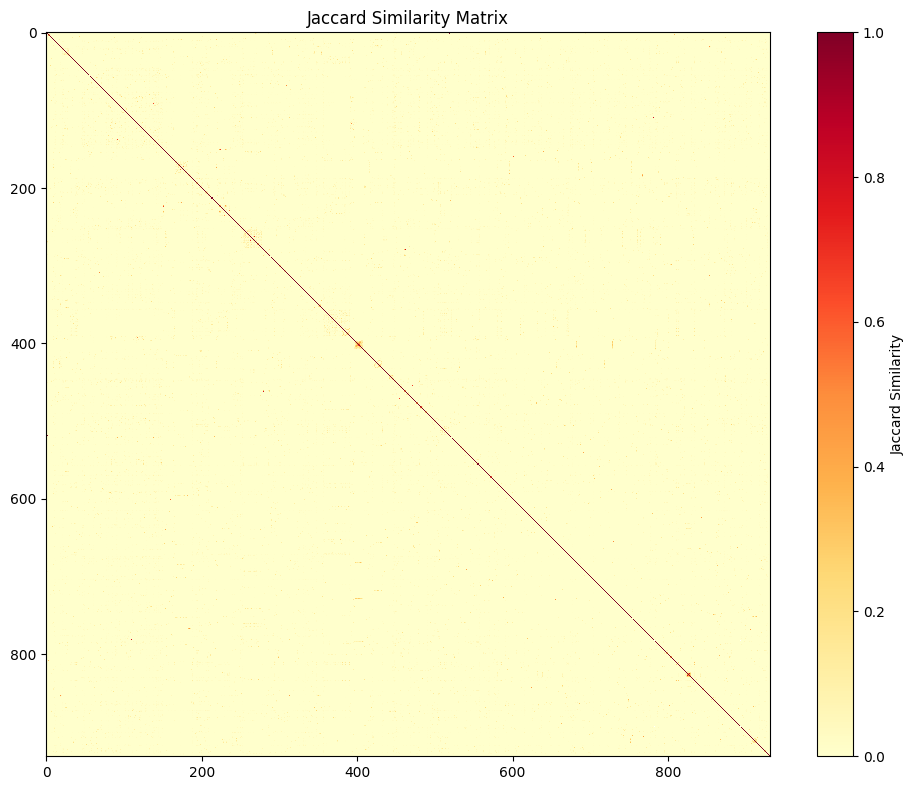

In [14]:
intersections = data.T @ data  # |Xi ∩ Xj|
feature_counts = data.sum(axis=0)  # |Xi|
feature_counts_2d = np.tile(feature_counts, feature_counts.shape[0]).reshape(
    feature_counts.shape[0], feature_counts.shape[0]
)
feature_counts_2d = feature_counts_2d.T + feature_counts_2d  # |Xi| + |Xj|
jaccard_similarity = intersections / (feature_counts_2d - intersections)
plt.figure(figsize=(10, 8))
plt.imshow(jaccard_similarity, cmap="YlOrRd", interpolation="none")
plt.colorbar(label="Jaccard Similarity")
plt.title("Jaccard Similarity Matrix")
plt.tight_layout()
plt.savefig("jaccard_similarity_matrix.png", dpi=300)
plt.show()

#### PCA

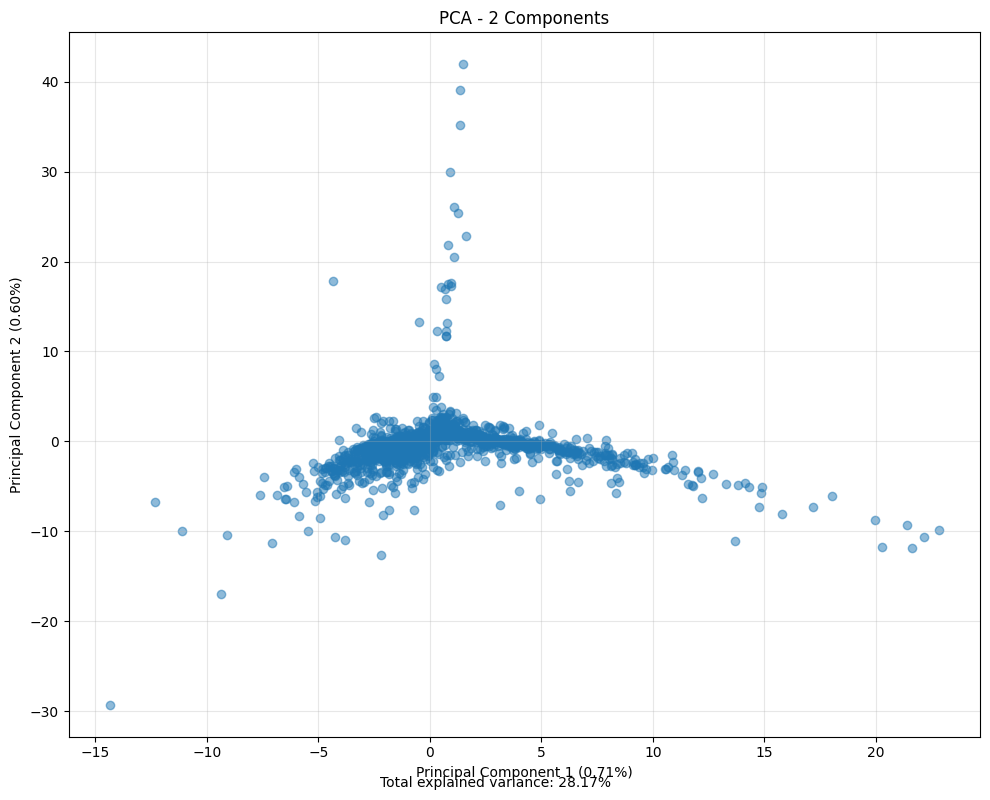

Variance explained by each component:
PC1: 0.71%
PC2: 0.60%
PC3: 0.56%
PC4: 0.51%
PC5: 0.50%
PC6: 0.47%
PC7: 0.45%
PC8: 0.44%
PC9: 0.43%
PC10: 0.41%
PC11: 0.40%
PC12: 0.39%
PC13: 0.38%
PC14: 0.37%
PC15: 0.36%
PC16: 0.36%
PC17: 0.35%
PC18: 0.35%
PC19: 0.34%
PC20: 0.34%
PC21: 0.33%
PC22: 0.32%
PC23: 0.32%
PC24: 0.32%
PC25: 0.31%
PC26: 0.31%
PC27: 0.31%
PC28: 0.30%
PC29: 0.30%
PC30: 0.30%
PC31: 0.29%
PC32: 0.29%
PC33: 0.29%
PC34: 0.28%
PC35: 0.28%
PC36: 0.28%
PC37: 0.28%
PC38: 0.28%
PC39: 0.27%
PC40: 0.27%
PC41: 0.27%
PC42: 0.27%
PC43: 0.27%
PC44: 0.27%
PC45: 0.26%
PC46: 0.26%
PC47: 0.26%
PC48: 0.26%
PC49: 0.26%
PC50: 0.25%
PC51: 0.25%
PC52: 0.25%
PC53: 0.25%
PC54: 0.25%
PC55: 0.25%
PC56: 0.25%
PC57: 0.24%
PC58: 0.24%
PC59: 0.24%
PC60: 0.24%
PC61: 0.24%
PC62: 0.23%
PC63: 0.23%
PC64: 0.23%
PC65: 0.23%
PC66: 0.23%
PC67: 0.23%
PC68: 0.23%
PC69: 0.22%
PC70: 0.22%
PC71: 0.22%
PC72: 0.22%
PC73: 0.22%
PC74: 0.22%
PC75: 0.22%
PC76: 0.22%
PC77: 0.21%
PC78: 0.21%
PC79: 0.21%
PC80: 0.21%
PC81: 0.21%

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k = 100  # Number of components
pca = PCA(n_components=k)
data_pca = pca.fit_transform(data_scaled)

# Plot the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%})")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%})")
plt.title("PCA - 2 Components")
plt.grid(True, alpha=0.3)

# Add explained variance information
total_var = sum(pca.explained_variance_ratio_[:k])
plt.figtext(0.5, 0.01, f"Total explained variance: {total_var:.2%}", ha="center")

# Save the figure
plt.tight_layout()
plt.savefig("pca_visualization.png", dpi=300)
plt.show()

# Display variance explained by each component
print("Variance explained by each component:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i + 1}: {ratio:.2%}")

#### t -SNE

Computing t-SNE with perplexity 20...


/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Computing t-SNE with perplexity 25...


/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Computing t-SNE with perplexity 30...


/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Computing t-SNE with perplexity 35...


/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Computing t-SNE with perplexity 40...


/Users/matthieuneau/Library/Caches/pypoetry/virtualenvs/mlns-challenge-r_D1LeLj-py3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


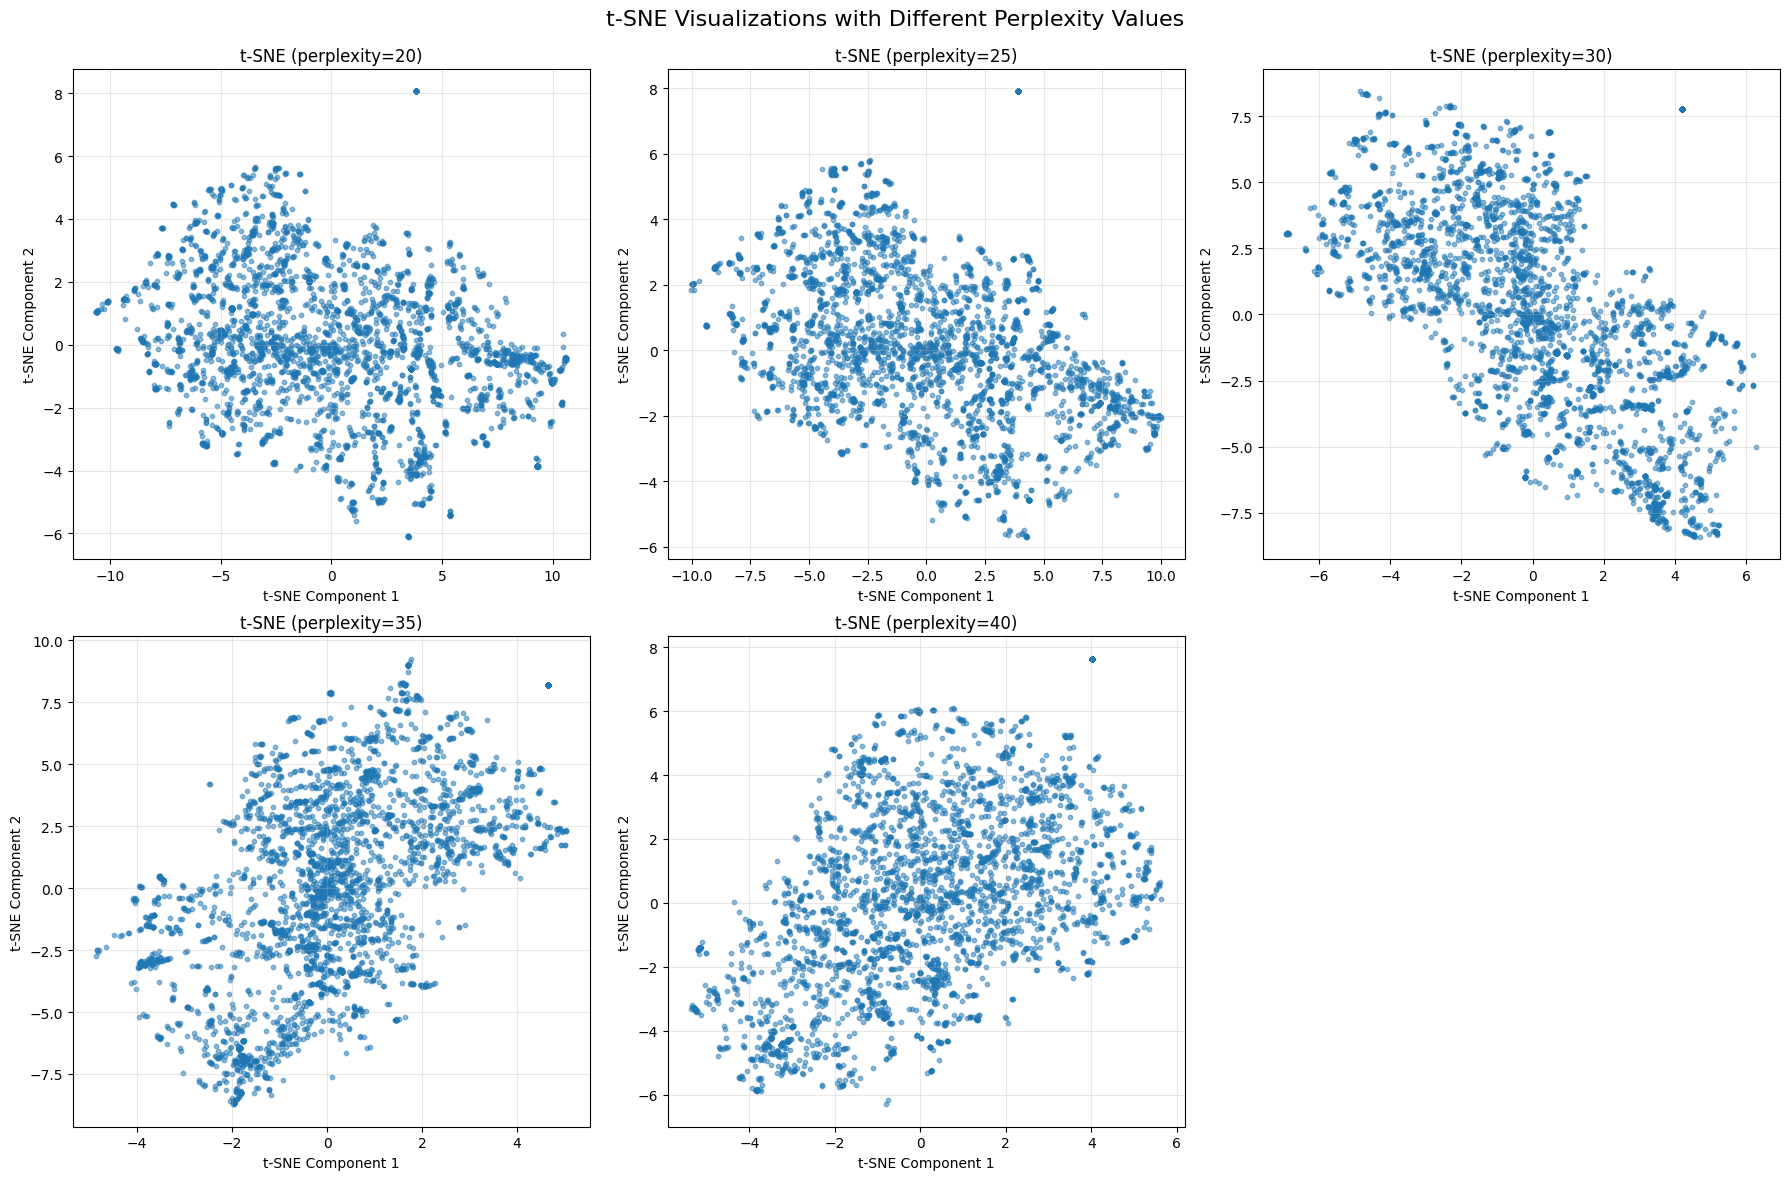

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexity_values = [20, 25, 30, 35, 40]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, perplexity in enumerate(perplexity_values):
    if i < len(axes):
        print(f"Computing t-SNE with perplexity {perplexity}...")
        tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300, random_state=42)
        embedding = tsne.fit_transform(data_scaled)

        # Plot on the corresponding subplot
        axes[i].scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=10)
        axes[i].set_title(f"t-SNE (perplexity={perplexity})")
        axes[i].set_xlabel("t-SNE Component 1")
        axes[i].set_ylabel("t-SNE Component 2")
        axes[i].grid(True, alpha=0.3)

# If we have an extra subplot, use it to show explained variance from PCA as reference
if len(perplexity_values) < len(axes):
    last_ax = axes[-1]
    last_ax.bar(range(10), pca.explained_variance_ratio_[:10] * 100)
    last_ax.set_title("PCA: Top 10 Components")
    last_ax.set_xlabel("Principal Component")
    last_ax.set_ylabel("Explained Variance (%)")
    last_ax.set_xticks(range(10))
    last_ax.set_xticklabels([f"{i + 1}" for i in range(10)])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("t-SNE Visualizations with Different Perplexity Values", fontsize=16)
plt.subplots_adjust(top=0.93)
plt.savefig("tsne_perplexity_comparison.png", dpi=300)
plt.show()